In [1]:
import numpy as np
import pandas as pd

## Aufgabe 1

#### a) Vorbereitung der Daten

Laden Sie den Datensatz aus der Datei **svm_data.csv** (s. Moodle) in einen DataFrame namens **X** . Die ersten beiden Spalten repräsentieren zwei numerische Features $x_1$ und $x_2$, die dritte Spalte eine binäre Zielvariable $y\in\{-1,1\}$. Spalten Sie die Zielvariable ab und entfernen Sie die Spalte aus dem DataFrame.

In [2]:
data = pd.read_csv('svm_data.csv')
y = data.iloc[:, -1]
data = data.drop(data.columns[-1], axis=1)

#### b) Visualisierung

Visualisieren Sie die Objekte des Datensatzes mit Hilfe eines Streudiagramms, in dem die Werte von $x_1$ und $x_2$ gegeneinander aufgetragen sind. Kennzeichnen Sie die Klassenzugehörigkeit durch verschiedene Farben.

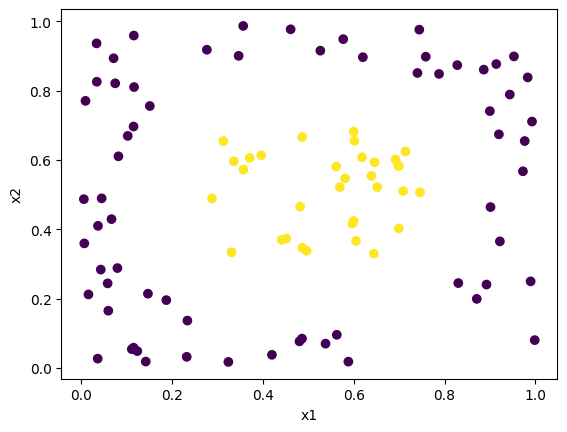

In [6]:
import matplotlib.pyplot as plt

x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]

plt.scatter(x1, x2, c=y, cmap=plt.viridis())
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#### c) Training eines SVM-Modells

Trainieren Sie auf dem gesamten Datensatz ein SVM-Modell mit Gauß-Kernel und den Parametern $C=1000$ und $\gamma=1$. Verwenden Sie dazu die Klasse sklearn.svm.SVC

In [7]:
from sklearn.svm import SVC

svc = SVC(C=1000, gamma=1)
svc.fit(data,y)

SVC(C=1000, gamma=1)

#### d) Decision Boundary und Margins

Zeichnen Sie in das Diagramm aus Teilaufgabe b) den ermittelten Decision Boundary und die Margins ein. Heben Sie auch die Stützvektoren farblich hervor.

/home/fabian/MasterStudium/PythonEnvironment/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


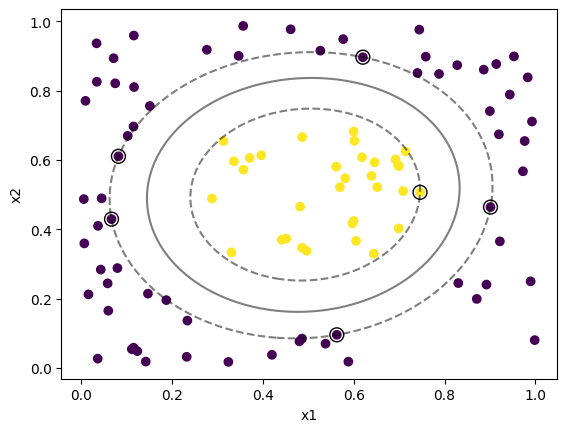

In [10]:
plt.scatter(x1, x2, c=y, cmap=plt.viridis())
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Meshgrid erstellen, um die Entscheidungsgrenze zu zeichnen
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Entscheidungsgrenze einzeichnen
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Margins und Support Vektoren einzeichnen
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Aufgabe 2

In dieser Aufgabe soll SVM zur Klassifikation von Ziffern aus dem <a href="http://yann.lecun.com/exdb/mnist/">MNIST-Datensatz</a> verwendet werden.

#### a) Datensatz laden

Laden Sie die Trainings- und Testdatensätze aus den CSV-Dateien **mnist-train-images.csv**, **mnist-train-labels.csv**, **mnist-test-images.csv** und **mnist-test-labels.csv** (s. Moodle) in NumPy-Arrays namens **X_train**, **y_train**, **X_test**, **y_test**. Jede Zeile von **X_train** bzw. **X_test** besteht dann aus 784=28*28 ganzzahligen Einträgen (Graustufenwerte zwischen 0 und 255) und repräsentiert eine handgeschriebene Ziffer.

In [25]:
X_train = pd.read_csv('mnist-dataset/mnist-train-images.csv')
y_train = pd.read_csv('mnist-dataset/mnist-train-labels.csv')

X_test = pd.read_csv('mnist-dataset/mnist-test-images.csv')
y_test = pd.read_csv('mnist-dataset/mnist-test-labels.csv')

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### b) Visualisierung

Zeichen Sie die ersten 25 Graustufenbilder des Datensatzes **X_train** in quadratischer Anordnung (Hinweise: matplotlib.pyplot.subplot, matploblib.pyplot.imshow). Versehen Sie die Bilder jeweils mit den korrekten Labels als Überschrift.

KeyError: 0

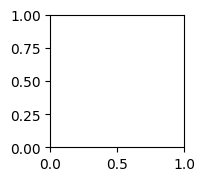

In [20]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Achsen ausschalten

plt.suptitle("Die ersten 25 Graustufenbilder des Datensatzes")
plt.show()

#### c) Pipeline anlegen 

Legen Sie eine Pipeline bestehend aus einem StandardScaler und einem SVM-Klassifikator an. Der SVM-Klassifikator soll den Gauß-Kernel verwenden. Der Klassifikator hängt von zwei Hyperparametern ab: dem Parameter $C$  und dem Parameter $\gamma=\frac{1}{2\sigma^2}$.  (s. Vorlesung)

In [ ]:
#TODO

#### d) Erstes Modelltraining

Setzen Sie die Hyperparameter des SVM-Klassifikators auf die Werte $\gamma=1$ und $C=100$ und fitten Sie die Pipeline anschließend auf dem Trainingsdatensatz. Berechnen Sie die Accuracy auf dem Trainings- und auf dem Testdatensatz. Erklären Sie Ihre Beobachtung.

Hinweis: die Ausführung kann ggf. ein paar Minuten dauern. Entwickeln Sie den Code zunächst nur mit einem kleineren Teil der Daten, z.B. 2000 Samples.

In [ ]:
#TODO

#### e) GridSearch

Führen Sie eine GridSearch auf den ersten 2000 Objekten des Trainingsdatensatzes durch, um die Hyperparameter $\gamma$ und $C$ zu optimieren. Wenden Sie dazu 3-fache Kreuzvalidierung an, und testen Sie für $C$ die Werte $\{1000,100,10,1,0.1\}$ und für $\gamma$ die Werte $\{10,1,0.1,0.01\}$. Geben Sie die gefundenen optimalen Parameter aus.

Hinweis: es wird davon ausgegangen, dass die ersten 2000 Datensätze hinreichend repräsentativ für den gesamten Trainingsdatensatz sind.

In [ ]:
#TODO

#### f) Modelltraining mit ermittelten Hyperparametern


Setzen Sie die Parameter des SVM-Klassifikators auf die soeben ermittelten optimalen Werte und trainieren Sie die Pipeline erneut. Wie lauten nun die Accuracy auf dem Trainings- und auf dem Testdatensatz?

In [ ]:
#TODO

#### g) Visualisierung einiger falsch klassifizierter Samples

Visualisieren Sie die ersten 25 falsch klassifizierten Ziffern in einer Anordnung von 5x5 Bildern. Versehen Sie die einzelnen Subplots mit Titeln, in sowohl das tatsächliche als auch als auch das prognostizierte Label enthalten.

In [ ]:
#TODO